# GRADIENT BOOSTING

El modelo de **Gradient Boosting** es una técnica de ensamblado basada en la construcción secuencial de modelos débiles (habitualmente árboles de decisión) que corrigen los errores cometidos por modelos anteriores.

Se diferencia de otros métodos de ensamblado como el **bagging** (ej. Random Forest) porque los árboles se entrenan de forma secuencial y no de manera independiente.

### Pasos iniciales

Importamos las librerías necesarias para trabajar con modelos de Gradient Boosting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

### Clasificación - Dataset de Diabetes

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columnas = ['NumEmbarazos', 'Glucosa', 'PresionSanguinea', 'PliegueCutaneo',
            'Insulina', 'IMC', 'Pedigree', 'Edad', 'Diabetes']

diabetes = pd.read_csv(url, names=columnas)
diabetes.head()

,NumEmbarazos,Glucosa,PresionSanguinea,PliegueCutaneo,Insulina,IMC,Pedigree,Edad,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Entrenamiento del modelo GradientBoostingClassifier

In [3]:
X = diabetes.drop('Diabetes', axis=1)
y = diabetes['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

### Evaluación del modelo de clasificación

In [4]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Regresión - Dataset de Boston Housing

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

column_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X_boston = pd.DataFrame(data, columns=column_names)
y_boston = pd.Series(target, name="MEDV")

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_117462/2271935314.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


### Entrenamiento del modelo GradientBoostingRegressor

In [6]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_b, y_train_b)
y_pred_b = gbr.predict(X_test_b)

### Evaluación del modelo de regresión

In [7]:
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test_b, y_pred_b):.2f}")
print(f"R² Score: {r2_score(y_test_b, y_pred_b):.2f}")

Error cuadrático medio (MSE): 6.21
R² Score: 0.92


### Importancia de variables

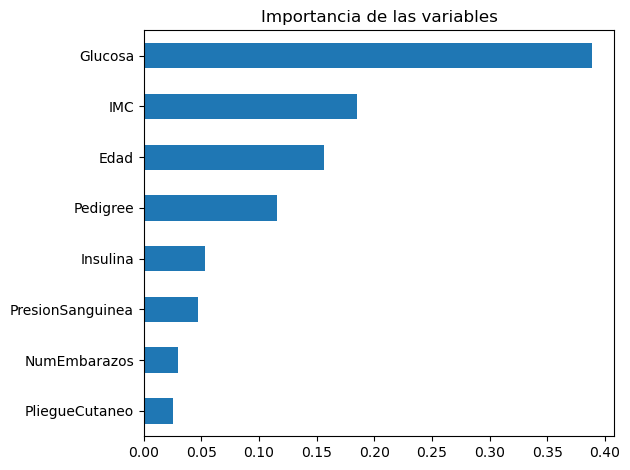

In [ ]:
importances = pd.Series(gbc.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Importancia de las variables - Diabetes')
plt.tight_layout()
plt.show()

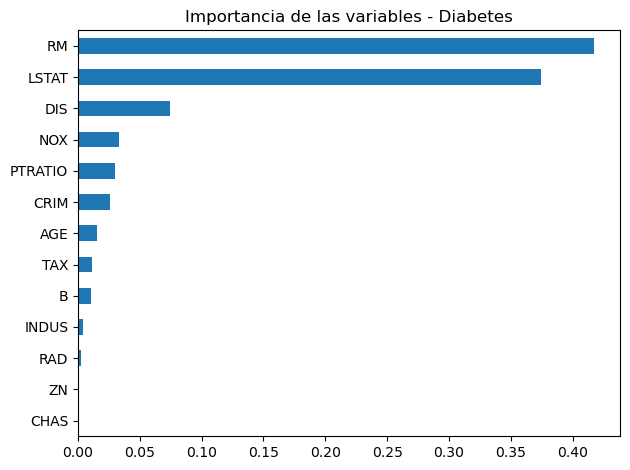

In [9]:
importances = pd.Series(gbr.feature_importances_, index=X_boston.columns)
importances.sort_values().plot(kind='barh', title='Importancia de las variables - Diabetes')
plt.tight_layout()
plt.show()

### ¿Qué es el Gradient Boosting?

Gradient Boosting construye modelos de forma secuencial. En cada iteración:
1. Se calcula el error del modelo actual.
2. Se ajusta un nuevo modelo (generalmente un árbol) para predecir este error.
3. Se combina el nuevo modelo con los anteriores.

El resultado es un modelo final que corrige progresivamente los errores anteriores.

#### Ventajas:
- Alta precisión predictiva.
- Control del sobreajuste con `learning_rate`.
- Se puede usar en clasificación y regresión.

#### Desventajas:
- Entrenamiento más lento que Random Forest.
- Requiere ajuste de hiperparámetros con más cuidado.

### Principales hiperparámetros de Gradient Boosting

| Parámetro | Descripción |
|-----------|-------------|
| `n_estimators` | Número de árboles (etapas) a construir. |
| `learning_rate` | Cuánto contribuye cada nuevo modelo a la predicción. |
| `max_depth` | Profundidad máxima de cada árbol base. |
| `subsample` | Fracción de muestras usadas para entrenar cada árbol. |
| `min_samples_split` | Número mínimo de muestras para dividir un nodo. |
| `min_samples_leaf` | Número mínimo de muestras en una hoja. |
| `max_features` | Número máximo de características para considerar en una división. |
| `loss` | Función de pérdida a optimizar (ej: `'deviance'` para clasificación, `'squared_error'` para regresión). |
| `random_state` | Reproducibilidad de resultados. |

> ✅ **Nota**: Un `learning_rate` más bajo mejora la generalización pero necesita más `n_estimators`.

## 🧠 Ejercicios de consolidación

1. **Modifica el número de árboles (`n_estimators`) y observa cómo afecta la precisión en clasificación.**
2. **Ajusta el `learning_rate` y analiza el cambio en R² para la regresión.**
3. **Prueba con `subsample < 1.0` para ver el efecto del *stochastic gradient boosting*.**
4. **Usa `GridSearchCV` para optimizar los hiperparámetros del modelo.**
5. **Compara los resultados obtenidos con Random Forest en los mismos datasets.**